In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
d0 = pd.read_csv('mnist_train.csv')
print(d0.head(5))

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [6]:
print(d0.shape)
l = d0['label']
d = d0.drop("label", axis=1)
#print(l)
#print(d)

(42000, 785)


In [7]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


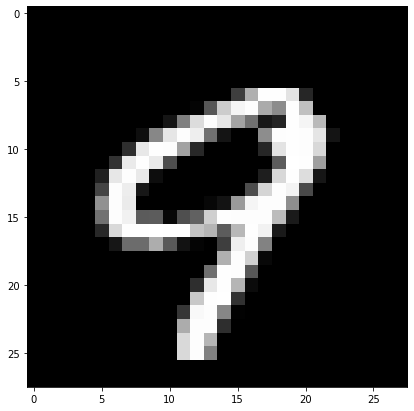

9


In [9]:
plt.figure(figsize=(7,7))
idx =100
grid_data = d.iloc[idx].to_numpy().reshape(28,28)              #taking the row 100th from d and covert into matrix and finally reshape to size 28 into 28
plt.imshow(grid_data, interpolation = "none", cmap = "gray")   #plotting the image of object grid data , cmap is color map
plt.show() #plot
print(l[idx])  #checking what is label at row 100th

In [11]:
#just reducing the size of rows and columns to run fast and view easily  nthg more than it 


labels = l.head(15000)
data = d.head(15000)
# print(labels.head)
print(labels.shape)
print(data.shape)

(15000,)
(15000, 784)


In [12]:
# data preprocessing :standardization of data
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [14]:
sample_data = standardized_data
covar_matrix = np.matmul(sample_data.T, sample_data)
print("the shape co varience matrix :", covar_matrix.shape)

the shape co varience matrix : (784, 784)


In [96]:
from scipy.linalg import eigh
values, vectors = eigh(covar_matrix , eigvals=(782,783))
print("shape of eigen vectors:" ,vectors.shape)
vectors = vectors.T   #why ? 
print("shape of updated eigen vectors" , vectors.shape)

shape of eigen vectors: (784, 2)
shape of updated eigen vectors (2, 784)


In [97]:
import matplotlib.pyplot as plt
import numpy as np
new_coordinates =np.matmul(vectors, sample_data.T)
print("resultant new data points shape : ", vectors.shape , "X" , sample_data.T.shape ,"=" , new_coordinates.shape)

resultant new data points shape :  (2, 784) X (784, 15000) = (2, 15000)


In [98]:
#appending a labels for new coordinate
import pandas as pd
new_coordinates = np.vstack((new_coordinates, labels)).T 
dataframe =pd.DataFrame(data=new_coordinates, columns=("1st principle" , "2nd principle", "label"))
#print(dataframe.head)
print(dataframe.shape)

(15000, 3)


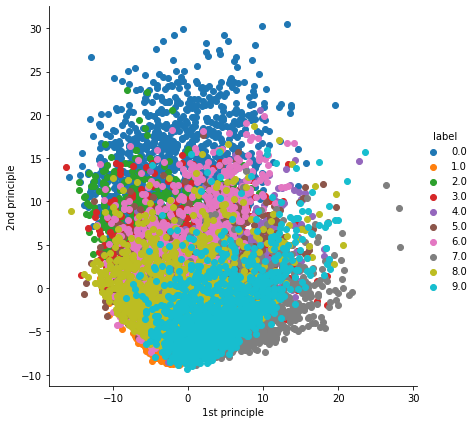

In [99]:
import seaborn as sn
sn.FacetGrid(dataframe, hue ='label', height=6).map(plt.scatter, "1st principle", "2nd principle").add_legend()
plt.show()

In [ ]:
# pca concept with scikit-learn  2nd way to represent pca

In [2]:
from sklearn import decomposition
pca = decomposition.PCA()

In [4]:
#configuring the parameter 
#the number of component is 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)
print("the shape of pca_reduced data :" , pca_data.shape)

NameError: name 'sample_data' is not defined

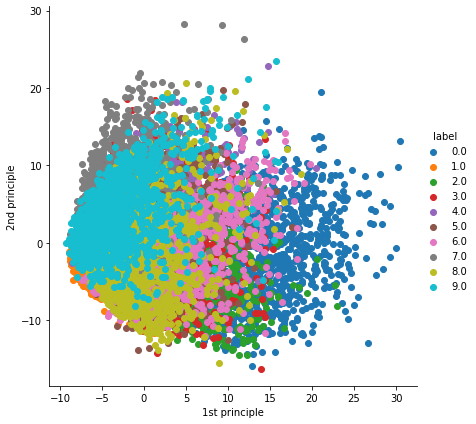

In [74]:
pca_data = np.vstack((pca_data.T,labels)).T  #convert 1500*2 into 2*15000 then label 3*15000 and fnally in horizontal 15000*3
pca_df = pd.DataFrame(data = pca_data, columns=("1st principle" , "2nd principle", "label"))
sn.FacetGrid(pca_df, hue ='label', height =6 ).map(plt.scatter, '1st principle' , "2nd principle").add_legend()
plt.show()

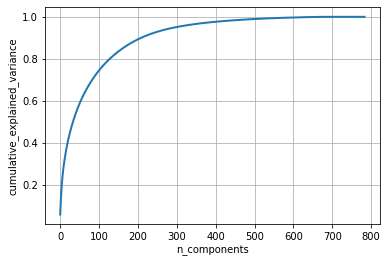

In [16]:
#now see why PCA is not used for visualition better ,mostly used for the dimention reduction but for visualistion
#because of if 10d want then we losss more and more information so its not good 

pca.n_components= 784
pca_data = pca.fit_transform(sample_data)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)

plt.figure(1, figsize=(6,4))

plt.clf()
plt.plot(cum_var_explained,linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('cumulative_explained_variance')
plt.show()



